## N차 과제 - API Scrapping_Reddit

- 주제: API를 활용한 데이터 불러오기 및 분석
- 데이터: 커뮤니티 텍스트 데이터(API 활용)
- 사용 라이브러리: praw, wordcloud, seaborn, nltk

### 1. 라이브러리 및 API 설정

1.1 미국 최대 커뮤니티 중 하나인 레딧(Reddit)에서 데이터를 불러오기 위해 praw 라이브러리를 install 해야 합니다.

1.2 라이브러리 설정

In [1]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from collections import Counter
from itertools import chain

In [2]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)

1.3 자연어처리를 위해 사용할 nltk 패키지를 다운로드하겠습니다(NLP 과제가 아니므로 자세히 살펴보지는 않겠습니다).

궁금하신 분들을 위해!
https://datascienceschool.net/03%20machine%20learning/03.01.01%20NLTK%20%EC%9E%90%EC%97%B0%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\김효훈\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\김효훈\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

1.4 API 인증을 받겠습니다. 절차의 경우 추가로 첨부한 자료를 참고해주세요.
### **과제를 제출할 때는 본 항목의 API 키들은 모두 지우고 제출해주세요! 공유되면 안 됩니다.**

In [4]:
#Reddit API 인증
reddit = praw.Reddit(
    client_id='QzTLdhi54lEDxeCoWi-4_A',
    client_secret='DsWYBcpThV03tpODqt3FIQeUm6ADBg',
    user_agent='DataCrawlingApp by Ok_Supermarket5057'
)

# 2. 데이터 수집 및 분석

## 2.1 API를 활용한 NVIDIA 게시글 가져오기

In [5]:
subreddit_name = 'stocks'
search_query = 'NVIDIA OR NVDA'
subreddit = reddit.subreddit(subreddit_name)
top_posts = subreddit.search(search_query, limit=300, sort='top')

In [6]:
# 함수 사용

def parse_submission(submission):
    return {
        "title" : submission.title,
        'score': submission.score,
        'url': submission.url,
        'num_comments': submission.num_comments,
        'selftext': submission.selftext
    }

In [7]:
# 데이터를 리스트로 저장
parsed_posts = []

for idx in top_posts:
    parsed_posts.append(parse_submission(idx))

In [8]:
for i in parsed_posts:
    print(f"Title: {i['title']}")
    print(f"Score: {i['score']}")
    print(f"URL: {i['url']}")
    print(f"Number of Comments: {i['num_comments']}")
    print(f"Body: {i['selftext']}")
    print("-" * 40)

Title: A note to young investors (or new investors)
Score: 6209
URL: https://www.reddit.com/r/stocks/comments/o1jm8m/a_note_to_young_investors_or_new_investors/
Number of Comments: 722
Body: As the Fed caused a bit of a ripple in the market today and I considered vacating a position (but ultimately didn't).  I thought a little bit about my journey over the years and thought I'd share a story and a few things I've learned.

Back in 2003, I made my first move in the stock market by taking an $1800 tax return and buying 200 shares of a coal company called Consol.  At the time it traded under the symbol CNX.  I bought it with almost no DD simply because it paid a pretty good dividend.  (Around .50/share if I recall correctly.)  This is back when internet trading really wasn't a thing.  I bought it through my bank and the trade cost me **$40**!  (I actually had to call a broker at my bank and place the trade over the phone.  Ancient times, right?)  lol  I figured, win lose or draw, eventual

# 2.2 가져온 데이터를 제목과 내용으로 분리된 데이터프레임으로 변환하기

In [9]:
# 표시할 최대 텍스트 길이 설정
pd.set_option('display.max_colwidth', 40)

In [10]:
nvda_df = pd.DataFrame(parsed_posts)
print(nvda_df)

                                       title  score  \
0    A note to young investors (or new in...   6209   
1    To all of you who are red this year ...   5844   
2    Pelosi's husband buying over $1 mill...   5792   
3     Beware of what AMC shorts are holding!   5366   
4              Blackberry -- A Dormant Giant   4532   
..                                       ...    ...   
230  Here is a Market Recap for today Thu...    272   
231  TSMC sales grow 45% in July on stron...    272   
232  META Still The Cheapest of The Magni...    274   
233  Made 30% since I started trading 7 m...    270   
234  CNBC: Meta’s advertising growth is p...    266   

                                         url  num_comments  \
0    https://www.reddit.com/r/stocks/comm...           722   
1    https://www.reddit.com/r/stocks/comm...          1165   
2    https://www.reddit.com/r/stocks/comm...           457   
3    https://www.reddit.com/r/stocks/comm...          1195   
4    https://www.reddit.com/r

In [11]:
nvda_df_tise = nvda_df.drop(["score", "url", "num_comments"], axis = 1)
print(nvda_df_tise)

                                       title  \
0    A note to young investors (or new in...   
1    To all of you who are red this year ...   
2    Pelosi's husband buying over $1 mill...   
3     Beware of what AMC shorts are holding!   
4              Blackberry -- A Dormant Giant   
..                                       ...   
230  Here is a Market Recap for today Thu...   
231  TSMC sales grow 45% in July on stron...   
232  META Still The Cheapest of The Magni...   
233  Made 30% since I started trading 7 m...   
234  CNBC: Meta’s advertising growth is p...   

                                    selftext  
0    As the Fed caused a bit of a ripple ...  
1    Lately I keep hearing the same old n...  
2    [Full Article](https://www.msn.com/e...  
3    I understand that most people in thi...  
4    ###**Abbreviation Index:**\n\nBB -- ...  
..                                       ...  
230  **PsychoMarket Recap - Thursday, Nov...  
231  (Bloomberg) -- Taiwan Semiconductor ...  


## 2.3 가져온 데이터를 토큰화, 불용어 제거 등 분석에 활용하기 위한 전처리 진행

### 제목 전처리

In [12]:
retokenize = RegexpTokenizer(r"[\w]+")

In [13]:
tk_title = nvda_df_tise["title"][0:234].apply(lambda x: retokenize.tokenize(str(x)))

In [14]:
print(tk_title)

0      [A, note, to, young, investors, or, ...
1      [To, all, of, you, who, are, red, th...
2      [Pelosi, s, husband, buying, over, 1...
3      [Beware, of, what, AMC, shorts, are,...
4              [Blackberry, A, Dormant, Giant]
                        ...                   
229    [Out, of, bed, and, into, the, red, ...
230    [Here, is, a, Market, Recap, for, to...
231    [TSMC, sales, grow, 45, in, July, on...
232    [META, Still, The, Cheapest, of, The...
233    [Made, 30, since, I, started, tradin...
Name: title, Length: 234, dtype: object


In [15]:
# 분석을 위해 사전에 flatten 진행
tk_title = list(chain(*tk_title))

In [16]:
print(tk_title)

['A', 'note', 'to', 'young', 'investors', 'or', 'new', 'investors', 'To', 'all', 'of', 'you', 'who', 'are', 'red', 'this', 'year', 'while', 'the', 'S', 'P500', 'is', 'up', '30', 'Pelosi', 's', 'husband', 'buying', 'over', '1', 'million', 'of', 'computer', 'chip', 'stock', 'ahead', 'of', 'vote', 'Beware', 'of', 'what', 'AMC', 'shorts', 'are', 'holding', 'Blackberry', 'A', 'Dormant', 'Giant', 'Wall', 'Street', 'Week', 'Ahead', 'for', 'the', 'trading', 'week', 'beginning', 'February', '22nd', '2021', 'My', '8', 'investing', 'guidelines', 'I', 'created', 'an', 'algo', 'that', 'tracks', 'the', 'most', 'hyped', 'stocks', 'on', 'Reddit', 'Here', 'are', 'the', 'results', 'for', 'this', 'week', 'Best', 'stocks', 'for', 'the', 'fourth', 'industrial', 'revolution', 'Britain', 'blocks', 'Microsoft', 's', '69', 'billion', 'acquisition', 'of', 'Activision', 'Blizzard', 'Sharing', 'my', 'top', 'companies', 'with', 'you', 'NVIDIA', 'Announces', 'Four', 'for', 'One', 'Stock', 'Split', 'Nvidia', 'passes

### 내용 전처리

In [17]:
tk_sft = nvda_df_tise["selftext"][0:234].apply(lambda x: retokenize.tokenize(str(x)))

In [18]:
print(tk_sft)

0      [As, the, Fed, caused, a, bit, of, a...
1      [Lately, I, keep, hearing, the, same...
2      [Full, Article, https, www, msn, com...
3      [I, understand, that, most, people, ...
4      [Abbreviation, Index, BB, Blackberry...
                        ...                   
229    [US, Stocks, Preview, Ahead, of, the...
230    [PsychoMarket, Recap, Thursday, Nove...
231    [Bloomberg, Taiwan, Semiconductor, M...
232    [Quick, glance, at, some, of, the, n...
233    [Hello, folks, I, am, a, 24, year, o...
Name: selftext, Length: 234, dtype: object


In [19]:
# 분석을 위해 사전에 flatten 진행
tk_sft = list(chain(*tk_sft))

### 불용어 제거하기

In [20]:
stop_words = set(stopwords.words("english"))

In [21]:
# title 불용어 제거
## 리스트 컴프리헨션 사용
tktitle_filtered = [idx for idx in tk_title
                   if idx.lower() not in stop_words]

In [22]:
# selftext 불용어 제거
tksft_filtered =  [idx for idx in tk_sft
                   if idx.lower() not in stop_words]

In [23]:
print(tksft_filtered)

['Fed', 'caused', 'bit', 'ripple', 'market', 'today', 'considered', 'vacating', 'position', 'ultimately', 'thought', 'little', 'bit', 'journey', 'years', 'thought', 'share', 'story', 'things', 'learned', 'Back', '2003', 'made', 'first', 'move', 'stock', 'market', 'taking', '1800', 'tax', 'return', 'buying', '200', 'shares', 'coal', 'company', 'called', 'Consol', 'time', 'traded', 'symbol', 'CNX', 'bought', 'almost', 'DD', 'simply', 'paid', 'pretty', 'good', 'dividend', 'Around', '50', 'share', 'recall', 'correctly', 'back', 'internet', 'trading', 'really', 'thing', 'bought', 'bank', 'trade', 'cost', '40', 'actually', 'call', 'broker', 'bank', 'place', 'trade', 'phone', 'Ancient', 'times', 'right', 'lol', 'figured', 'win', 'lose', 'draw', 'eventually', 'stock', 'pay', 'dividend', 'follow', 'market', 'much', 'really', 'holding', 'dividend', 'realized', 'couple', 'years', 'later', 'climbed', '30s', 'Around', '2007', 'hit', '55', 'decided', 'sell', 'Still', 'bank', 'trade', 'cost', 'anothe

## 2.4 전처리된 데이터를 활용해 어떤 단어가 가장 많이 나왔는지 WordCloud를 통해 확인

In [24]:
# 제목에서 나온 단어 수 계산하기
counts_title = Counter(tktitle_filtered)
print(counts_title)

Counter({'Nvidia': 48, 'AI': 25, 'NVDA': 24, 'stock': 20, 'stocks': 20, 'Intel': 19, 'market': 17, 'billion': 15, 'AMD': 13, 'chip': 11, 'week': 10, 'NVIDIA': 10, 'earnings': 10, 'years': 10, 'year': 8, '1': 8, '2021': 8, '8': 8, 'cap': 8, 'company': 8, 'next': 8, '4': 8, 'buy': 8, 'new': 7, '5': 7, '10': 7, '2022': 7, 'today': 7, 'CEO': 7, 'tech': 7, 'TSMC': 7, 'buying': 6, 'Wall': 6, 'Street': 6, 'trading': 6, 'beginning': 6, 'companies': 6, 'Stock': 6, 'revenue': 6, 'chips': 6, 'beats': 6, 'dip': 6, 'Apple': 6, 'Market': 6, '2': 6, 'Week': 5, 'Ahead': 5, 'demand': 5, 'going': 5, 'first': 5, 'sales': 5, 'trillion': 5, 'Tesla': 5, 'Amazon': 5, '2020': 5, 'P': 5, '500': 5, 'Jan': 5, 'Reddit': 4, 'Microsoft': 4, 'U': 4, 'value': 4, 'beat': 4, '40': 4, 'short': 4, 'hit': 4, 'estimates': 4, 'expectations': 4, 'strong': 4, 'think': 4, 'time': 4, 'high': 4, 'Arm': 4, 'boom': 4, 'price': 4, 'like': 4, 'right': 4, 'ago': 4, 'shares': 4, 'says': 4, 'big': 4, 'Time': 4, 'prices': 4, 'still': 4,

In [25]:
# NLP를 많이 안해봐서, 중요한 단어를 선택하는 기준을 잘 모름
## 일단은 빈도수가 2인 것들까지는 제거
### Counter()가 딕셔너리 형태로 반환하기에, 딕셔너리 컴프리헨션을 사용하여 정리

counts_title = {word : count for word, count in counts_title.items() if count > 2}

In [26]:
print(counts_title)

{'new': 7, 'red': 3, 'year': 8, 'buying': 6, '1': 8, 'million': 3, 'chip': 11, 'stock': 20, 'Wall': 6, 'Street': 6, 'Week': 5, 'Ahead': 5, 'trading': 6, 'week': 10, 'beginning': 6, '2021': 8, '8': 8, 'investing': 3, 'stocks': 20, 'Reddit': 4, 'Microsoft': 4, 'billion': 15, 'acquisition': 3, 'top': 3, 'companies': 6, 'NVIDIA': 10, 'Stock': 6, 'Nvidia': 48, 'passes': 3, 'market': 17, 'cap': 8, 'U': 4, 'company': 8, 'Billion': 3, 'Investing': 3, 'revenue': 6, 'growth': 3, 'demand': 5, 'data': 3, 'center': 3, 'chips': 6, 'Cathie': 3, 'Wood': 3, 'rally': 3, 'value': 4, 'major': 3, 'portfolio': 3, 'beat': 4, '40': 4, 'worth': 3, 'less': 3, 'NVDA': 24, 'AI': 25, 'going': 5, 'next': 8, 'day': 3, 'short': 4, 'hit': 4, 'first': 5, 'estimates': 4, 'NIO': 3, '5': 7, 'months': 3, '10': 7, 'beats': 6, 'earnings': 10, 'expectations': 4, 'strong': 4, 'gaming': 3, 'sales': 5, 'Anyone': 3, 'think': 4, 'dip': 6, 'Apple': 6, 'time': 4, 'high': 4, 'trillion': 5, '2023': 3, 'Arm': 4, 'Next': 3, 'Tesla': 5, 

In [27]:
# 출력 결과 확인 이후 좀 더 구글링 해본 결과
## 문자가 3개 이하 및 숫자인 것들은 제거하는 내용들을 보았음
### 따라서 제거 실행

counts_title = {word : count for word, count in counts_title.items() if not word.isdigit() and len(word) > 3}

In [28]:
# https, year, CLICK, since 등 불필요한 단어들 제거

not_using_title = ["stocks", "comes", "years", "Nvidia", "NVIDIA", "Week", "Cathie", "NVDA", "Reddit", "company", "going", "next", "today",
                  "year", "week", "says", "Tuesday", "Next", "Time", "first", "think", "Wood"]

In [29]:
counts_title = { word : count for word, count in counts_title.items() if word not in not_using_title}

In [30]:
print(counts_title)

{'buying': 6, 'million': 3, 'chip': 11, 'stock': 20, 'Wall': 6, 'Street': 6, 'Ahead': 5, 'trading': 6, 'beginning': 6, 'investing': 3, 'Microsoft': 4, 'billion': 15, 'acquisition': 3, 'companies': 6, 'Stock': 6, 'passes': 3, 'market': 17, 'Billion': 3, 'Investing': 3, 'revenue': 6, 'growth': 3, 'demand': 5, 'data': 3, 'center': 3, 'chips': 6, 'rally': 3, 'value': 4, 'major': 3, 'portfolio': 3, 'beat': 4, 'worth': 3, 'less': 3, 'short': 4, 'estimates': 4, 'months': 3, 'beats': 6, 'earnings': 10, 'expectations': 4, 'strong': 4, 'gaming': 3, 'sales': 5, 'Anyone': 3, 'Apple': 6, 'time': 4, 'high': 4, 'trillion': 5, 'Tesla': 5, 'forecast': 3, 'boom': 4, 'selling': 3, 'GPUs': 3, 'price': 4, 'member': 3, 'Intel': 19, 'invest': 3, 'Amazon': 5, 'Market': 6, 'actually': 3, 'like': 4, 'falls': 3, 'board': 3, 'right': 4, 'Magnificent': 3, 'shares': 4, 'Google': 3, 'tech': 7, 'progress': 3, 'prices': 4, 'still': 4, 'crazy': 4, 'TSMC': 7, 'anyone': 4, 'plan': 3, 'Recap': 4, 'quarter': 3}


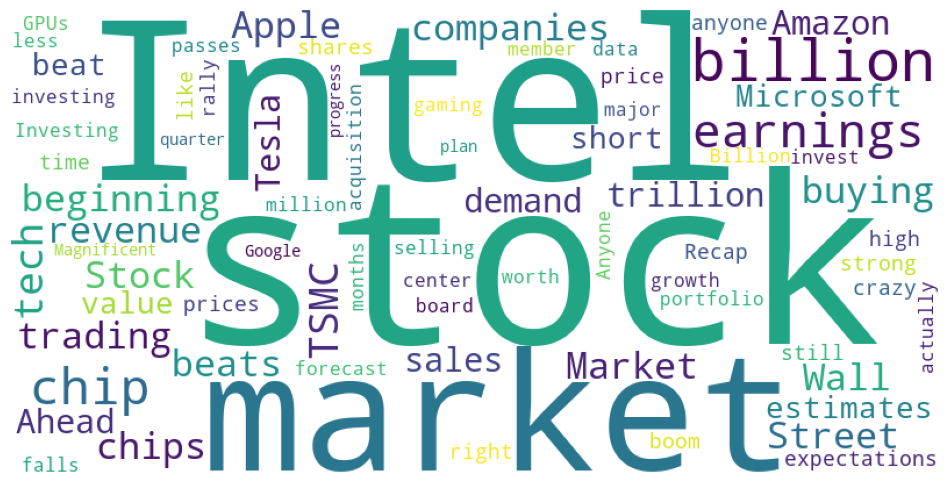

In [31]:
cloud_title = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(counts_title)

# 제목 시각화
plt.figure(figsize=(12, 8))
plt.imshow(cloud_title)
plt.axis("off")
plt.show()

In [32]:
# 내용에서 나온 단어 수 확인하기
counts_sft = Counter(tksft_filtered)
print(counts_sft)

Counter({'com': 620, 'https': 571, 'earnings': 562, '0': 549, '2': 464, 'year': 463, 'company': 461, 'market': 451, 'Nvidia': 426, 'day': 420, '3': 401, '1': 396, 'stock': 386, 'said': 378, 'billion': 357, '5': 291, 'AI': 276, '4': 264, 'companies': 264, 'stocks': 262, 'www': 253, 'price': 250, 'CLICK': 247, 'Intel': 245, 'since': 244, 'last': 243, 'revenue': 239, '6': 224, 'time': 217, 'week': 209, 'like': 206, 'chips': 205, '10': 202, 'also': 200, 'one': 199, 'AMD': 197, 'new': 195, '7': 194, 'png': 193, 'years': 192, 'going': 189, 'NVDA': 189, 'share': 187, '2020': 182, 'would': 178, 'release': 175, '8': 174, '_': 168, '20': 161, '9': 157, 'data': 153, 'high': 152, 'P': 149, 'growth': 148, 'could': 146, 'per': 146, 'sales': 145, 'CHART': 144, '500': 140, 'higher': 140, 'Friday': 137, 'Tesla': 132, 'Amazon': 132, 'Microsoft': 130, 'well': 130, '2021': 127, 'expected': 127, 'quarter': 126, 'move': 124, 'trading': 124, 'shares': 121, 'people': 121, 'Apple': 121, 'big': 118, 'imgur': 11

In [33]:
# 위와 마찬가지로 실행
## 일단은 빈도수가 2인 것들까지는 제거
### Counter()가 딕셔너리 형태로 반환하기에, 딕셔너리 컴프리헨션을 사용하여 정리

counts_sft = {word : count for word, count in counts_sft.items() if count > 10}

In [34]:
print(counts_sft)

{'Fed': 36, 'caused': 11, 'bit': 29, 'market': 451, 'today': 53, 'position': 31, 'thought': 22, 'little': 31, 'years': 192, 'share': 187, 'story': 14, 'things': 38, 'made': 62, 'first': 103, 'move': 124, 'stock': 386, 'taking': 23, 'tax': 16, 'return': 50, 'buying': 88, '200': 84, 'shares': 121, 'company': 461, 'called': 42, 'time': 217, 'traded': 15, 'bought': 44, 'almost': 27, 'DD': 31, 'simply': 13, 'pretty': 35, 'good': 72, 'dividend': 26, '50': 97, 'back': 97, 'internet': 13, 'trading': 124, 'really': 79, 'thing': 34, 'bank': 13, 'trade': 20, 'cost': 34, '40': 54, 'actually': 34, 'call': 71, 'place': 27, 'times': 40, 'right': 62, 'lose': 13, 'eventually': 11, 'pay': 30, 'much': 105, 'holding': 20, 'couple': 14, 'later': 31, 'climbed': 12, 'hit': 40, '55': 38, 'decided': 18, 'sell': 54, 'another': 47, 'took': 24, 'money': 96, 'put': 38, 'account': 18, 'nothing': 15, '2016': 23, 'missed': 11, 'crash': 19, '08': 34, 'saw': 34, 'coming': 63, 'reading': 41, 'investor': 23, 'trades': 16

In [35]:
## 문자가 3개 이하 및 숫자인 것들은 제거

counts_sft = {word : count for word, count in counts_sft.items() if not word.isdigit() and len(word) > 3}

In [36]:
print(counts_sft)

{'caused': 11, 'market': 451, 'today': 53, 'position': 31, 'thought': 22, 'little': 31, 'years': 192, 'share': 187, 'story': 14, 'things': 38, 'made': 62, 'first': 103, 'move': 124, 'stock': 386, 'taking': 23, 'return': 50, 'buying': 88, 'shares': 121, 'company': 461, 'called': 42, 'time': 217, 'traded': 15, 'bought': 44, 'almost': 27, 'simply': 13, 'pretty': 35, 'good': 72, 'dividend': 26, 'back': 97, 'internet': 13, 'trading': 124, 'really': 79, 'thing': 34, 'bank': 13, 'trade': 20, 'cost': 34, 'actually': 34, 'call': 71, 'place': 27, 'times': 40, 'right': 62, 'lose': 13, 'eventually': 11, 'much': 105, 'holding': 20, 'couple': 14, 'later': 31, 'climbed': 12, 'decided': 18, 'sell': 54, 'another': 47, 'took': 24, 'money': 96, 'account': 18, 'nothing': 15, 'missed': 11, 'crash': 19, 'coming': 63, 'reading': 41, 'investor': 23, 'trades': 16, 'done': 31, 'quite': 19, 'NVIDIA': 62, 'around': 86, 'used': 78, 'held': 14, 'sold': 44, 'stocks': 262, 'started': 47, 'course': 21, 'turned': 12, '

In [37]:
# 위에 title은 빈도수로 자동 정리해 주는데, 내용은 어째서 안되는지 모르겠음
## ChatGPT 사용한 부분

sorted_counts = dict(sorted(counts_sft.items(), key = lambda item: item[1], reverse = True))

In [38]:
for word, freq in list(sorted_counts.items())[:100]:
    print(f"{word}: {freq}")

https: 571
earnings: 562
year: 463
company: 461
market: 451
Nvidia: 426
stock: 386
said: 378
billion: 357
companies: 264
stocks: 262
price: 250
CLICK: 247
Intel: 245
since: 244
last: 243
revenue: 239
time: 217
week: 209
like: 206
chips: 205
also: 200
years: 192
going: 189
NVDA: 189
share: 187
would: 178
release: 175
data: 153
high: 152
growth: 148
could: 146
sales: 145
CHART: 144
higher: 140
Friday: 137
Tesla: 132
Amazon: 132
Microsoft: 130
well: 130
expected: 127
quarter: 126
move: 124
trading: 124
shares: 121
people: 121
Apple: 121
imgur: 118
past: 118
still: 117
chip: 114
report: 114
estimates: 114
million: 110
business: 106
make: 106
much: 105
first: 103
investors: 100
10day: 100
interest: 99
tech: 99
think: 98
back: 97
money: 96
long: 95
next: 94
GPUs: 92
gaming: 90
recent: 89
average: 89
month: 89
buying: 88
around: 86
html: 86
TSMC: 86
index: 85
technology: 85
demand: 85
news: 84
even: 84
months: 81
really: 79
used: 78
industry: 78
cnbc: 78
investing: 77
beat: 77
Market: 77
sent

In [39]:
# https, year, CLICK, since 등 불필요한 단어들 제거

not_using = [ 'https', 'CLICK', 'imgur', 'html', 'x200B', '10day', "Nvidia", 'NVIDIA', 'cloud', 'MARKET',"quater", "CHART", "share", "shares",
    'said', 'also', 'still', 'well', 'since', 'time', 'people', 'would', 'really', "could", "release", "years", "Market", "recent", "average",
    'next', 'even', 'months', 'many', 'first', 'much', 'long', 'make', 'like', 'going', 'last', 'company', "buying", "expected",
    'number', 'term', 'call', 'know', 'good', 'better', 'billion', 'million', 'price', 'year', 'week', 'NVDA', "investing", "estimates",
    'today', 'little', 'things', 'move', 'stock', 'back', 'around', 'used', 'money', 'trade', 'cost', 'right', "ESTIMATES", "TIME", "days",
    'sell', 'another', 'took', 'nothing', 'trading', 'coming', 'done', 'place', 'times', 'holding', 'started', "world", "current", "continue"
    'course', 'worth', 'hard', 'keep', 'sell', 'might', 'take', 'every', 'look', 'hope', 'big', 'keep', 'said', "March", "February", "reported",
    'companies', 'Nvidia', 'billion', 'price', 'stocks', 'share', 'sales', 'Tesla', 'Amazon', 'Microsoft', 'high', 'week', 'Friday',
    'think', 'month', 'index', 'according', 'reddit', 'Wednesday', 'Thursday', 'Tuesday', 'likely', 'currently', 'Earnings', "EARNINGS",
    'based', 'including', 'announced', 'ahead', 'already', 'second', 'Investor', "Apple", "Intel", "TSMC", "nvidia", "Google", "Musk",
    "chips", "tech", "GPUs", "chip", "gaming", "software", "technology", "semiconductor", "artificial", "intelligence", "graphics",
    "fund", "rates", "interest", "trillion", "economy", "funds", "cash", "decline", "increase", "pricing", "value", "investment", 
    "markets", "news", "media", "cnbc", "investors", "demand", "industry", "beat", "sentiment", "following", "consensus", "future", "prices", "deal", 
    "best", "moving", "comments", "target", "strong", "lower", "need", "rate", "made", "performance", "chart", "post", "uploads", "record", 
    "large", "part", "Stock", "build", "open", "point", "continue", "growing", "level", "http", "versus", "line", "notable", "elite", "return", "sector", 
    "expecting", "close", "quarters", "believe", "short", "making", "bespokepremium", "portfolio", "work", "Monday", "highs", "total", "models", "power", 
    "traders", "finviz", "ashx", "want", "three", "highest", "Overall",  "products", "product", "bought", "sold", "MSFT", "October", "revised", 
    "profit", "seen", "China", "less", "expectations", "August", "estimate", "contracts", "averaged", "called", "small", "invest", "come", "massive", 
    "using", "confirmed", "approximately", "reading", "TSLA", "Global", "increasing", "drifted", "st_c", "sch_200p", "sma_50", "sma_200", 
    "sma_20", "sma_100", "bb_20_2", "rsi_b_14", "macd_b_12_26_9", "stofu_b_14_3_3", "financial", "early", "customers", "spending", 
    "increased", "largest", "least", "raised", "expect", "help", "inflation", "Whisper", "Consensus", "Option", "global", "production", "board", 
    "major", "AMZN", "expiring", "recently", "several", "Source", "stimulus",  "income", "Short", "manufacturing", "getting", "June", "Gelsinger", 
    "earlier", "late", "process", "boom", "driving", "different", "tumblr", "supply", "pandemic", "gains", "numbers", "January", "retail", "pretty", 
    "start", "AAPL", "third", "important", "ETFs", "Corp", "Costco", "thing", "actually", "potential", "results", "analysts", "half", "rose", "great", 
    "working", "consumer", "September", "loss", "private", "period", "everyone", "told", "WEEK", "nearly", "content", "chipmaker", "near", "position", 
    "later", "means", "Facebook", "trying", "looking", "gain", "though", "crypto", "competition", "valuation", "biggest", "April", "selling", 
    "within", "Street", "margin", "huge", "fact", "costs", "plans", "points", "Revenue", "levels", "example", "OpenAI", "fall", "plan", "options", 
    "behind", "possible", "includes", "makes", "Major", "economic", "reports", "percentage", "says", "computing", "across", "expects", "server", "ever", 
    "given", "single", "away", "whether", "Wall", "Blackberry", "especially", "articles", "Open", "package", "reason", "change", "upcoming", "LINK", 
    "five", "Close", "always", "CNBC", "fell", "Meta", "almost", "sectors", "dollars", "play", "system", "support", "model", "something", "create", 
    "Taiwan", "processing", "focus", "latest", "design", "split", "dividend", "everything", "understand", "However", "vehicle", "Samsung", "maker", 
    "building", "comes", "learning", "individual", "self", "enough", "rally", "center", "Stocks", "advanced", "amount", "profits", "real", "autonomous", 
    "vehicles", "firm", "beginning", "security", "either", "provide", "energy", "become", "compared", "looks", "correction", "comment", "businesses", 
    "giant", "employees", "longer", "never", "came", "rising", "public", "risk", "forward", "government", "lost", "without", "Federal", "smaller", 
    "guidance", "drop", "full", "July", "processors", "core", "Anthropic", "taking", "investor", "Technology", "COVID", "Alphabet", "High", 
    "Index", "space", "released", "along", "roughly", "games", "Netflix", "invested", "grow", "finance", "infrastructure", "thought", "Even", 
    "worst", "bubble", "weeks", "Russell", "competitors", "systems", "reach", "despite", "dollar", "able", "include", "Growth", "case", 
    "date", "Bloomberg", "show", "rise", "fiscal", "adding", "units", "research", "generative", "guys", "applications", "hyperinflation2020", 
    "bull", "side", "platform", "customer", "acquisition", "overall", "blackberry", "video", "added", "significant", "read", "services", 
    "focused", "head", "chief", "Indices", "history", "continued", "basis", "positive", "decreased", "control", "Data", "quotes", 
    "Gaming", "expensive", "Companies", "extremely", "person", "Wood", "Shares", "went", "soon", "capital", "Huang", "yahoo", "Trump", 
    "hold", "takes", "computer", "decision", "November", "order", "strategy", "similar", "hardware", "interested", "series", "dropped", "Group", 
    "rather", "cars", "Nasdaq", "Powell", "annual", "December", "surge", "bullish", "shown", "saying", "home", "returns", "mentioned", "among", 
    "ARKK", "packaging", "mining", "Consumer", "closed", "crash", "quite", "Financial", "driven", "hype", "prior", "list", "anything", "partnership", 
    "four", "seeing", "develop", "game", "Also", "BlackBerry", "sure", "result", "double", "multiple", "instead", "broader", "Treasury", 
    "service", "Since", "remain", "opportunity", "recession", "Tech", "usually", "changed", "main", "range", "servers", "available", 
    "analyst", "Dell", "funding", "holdings", "cents", "Learning", "Deep", "election", "Ideas", "decided", "account", "caps", "whole", 
    "broad", "benefit", "information", "operating", "Sony", "others", "bigger", "Bank", "seems", "jump", "reporting", "moves", "leading", 
    "bear", "additional", "reached", "hand", "Call", "Advanced", "Micro", "segment", "machine", "Need", "robots"]

In [40]:
counts_sft = { word : count for word, count in counts_sft.items() if word not in not_using}

In [41]:
print(counts_sft)

{'caused': 11, 'market': 451, 'story': 14, 'traded': 15, 'simply': 13, 'internet': 13, 'bank': 13, 'lose': 13, 'eventually': 11, 'couple': 14, 'climbed': 12, 'missed': 11, 'trades': 16, 'held': 14, 'course': 21, 'turned': 12, 'nice': 11, 'effort': 13, 'lead': 16, 'type': 12, 'heavily': 16, 'taken': 12, 'Ford': 15, 'thinking': 16, 'advance': 14, 'potentially': 13, 'true': 12, 'state': 14, 'Well': 12, 'data': 153, 'industries': 12, 'Energy': 17, 'Small': 11, 'green': 12, 'Every': 11, 'pick': 15, 'stop': 13, 'consider': 12, 'putting': 13, 'majority': 12, 'Pelosi': 11, 'House': 17, 'purchase': 12, 'Congress': 17, 'give': 17, 'office': 11, 'states': 13, 'billions': 17, 'zero': 13, 'realize': 17, 'News': 14, 'Meanwhile': 11, 'fully': 11, 'knowledge': 12, 'discuss': 11, 'cases': 14, 'talk': 14, 'Trust': 17, 'happened': 14, 'kind': 11, 'moment': 14, 'begin': 17, 'positions': 15, 'Right': 12, 'SPDR': 11, 'Motors': 13, 'iShares': 11, 'Technologies': 11, 'Investors': 15, 'Disney': 15, 'listed': 1

In [42]:
# 빈도수 재확인
sorted_counts = dict(sorted(counts_sft.items(), key = lambda item: item[1], reverse = True))

In [43]:
for word, freq in list(sorted_counts.items())[:500]:
    print(f"{word}: {freq}")

earnings: 562
market: 451
revenue: 239
data: 153
growth: 148
higher: 140
quarter: 126
past: 118
report: 114
business: 106
intel: 42
course: 21
experience: 18
margins: 18
find: 18
happens: 18
foundry: 18
matter: 18
amid: 18
Corsair: 18
Energy: 17
House: 17
Congress: 17
give: 17
billions: 17
realize: 17
Trust: 17
begin: 17
Qualcomm: 17
particularly: 17
allow: 17
outside: 17
leader: 17
concerns: 17
Markets: 17
relative: 17
closing: 17
jobs: 17
mean: 17
valuable: 17
antitrust: 17
BABA: 17
Xbox: 17
platforms: 17
continues: 17
feel: 17
negative: 17
issues: 17
semiconductors: 17
ChatGPT: 17
impact: 17
investments: 17
Jones: 17
cards: 17
H100: 17
declined: 17
yield: 17
dividends: 17
postimg: 17
trades: 16
lead: 16
heavily: 16
thinking: 16
however: 16
question: 16
remains: 16
revenues: 16
initial: 16
yesterday: 16
towards: 16
morning: 16
known: 16
Reserve: 16
personal: 16
yields: 16
probably: 16
FRIDAY: 16
Today: 16
alone: 16
claims: 16
trend: 16
effect: 16
President: 16
turn: 16
popular: 16
st

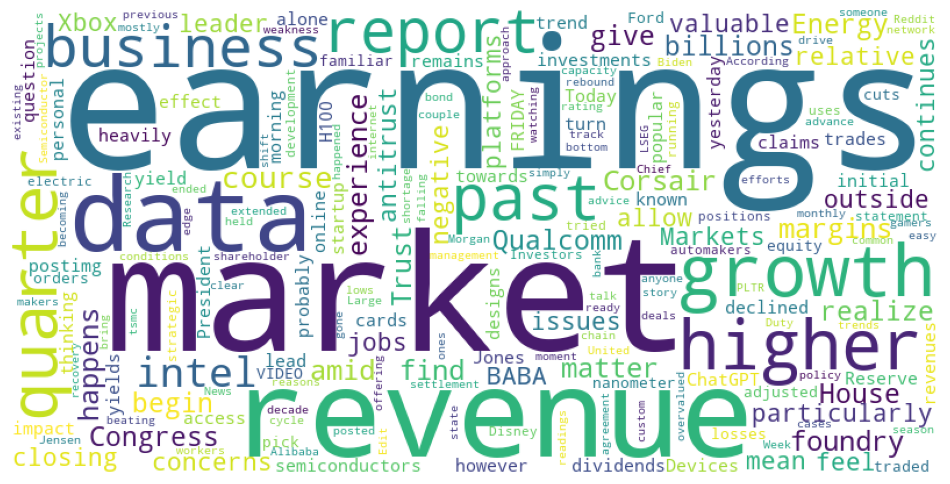

In [44]:
cloud_sft = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(counts_sft)

# 내용 시각화
plt.figure(figsize=(12, 8))
plt.imshow(cloud_sft)
plt.axis("off")
plt.show()

## 2.6 가장 많이 나온 단어에는 어떤 것들이 있는지 barplot을 그려 확인하세요.

### 빈도수 확인

In [45]:
# 제목 빈도수 확인
sorted_title = dict(sorted(counts_title.items(), key = lambda item: item[1], reverse = True))

In [46]:
for word, freq in list(sorted_title.items())[:100]:
    print(f"{word}: {freq}")

stock: 20
Intel: 19
market: 17
billion: 15
chip: 11
earnings: 10
tech: 7
TSMC: 7
buying: 6
Wall: 6
Street: 6
trading: 6
beginning: 6
companies: 6
Stock: 6
revenue: 6
chips: 6
beats: 6
Apple: 6
Market: 6
Ahead: 5
demand: 5
sales: 5
trillion: 5
Tesla: 5
Amazon: 5
Microsoft: 4
value: 4
beat: 4
short: 4
estimates: 4
expectations: 4
strong: 4
time: 4
high: 4
boom: 4
price: 4
like: 4
right: 4
shares: 4
prices: 4
still: 4
crazy: 4
anyone: 4
Recap: 4
million: 3
investing: 3
acquisition: 3
passes: 3
Billion: 3
Investing: 3
growth: 3
data: 3
center: 3
rally: 3
major: 3
portfolio: 3
worth: 3
less: 3
months: 3
gaming: 3
Anyone: 3
forecast: 3
selling: 3
GPUs: 3
member: 3
invest: 3
actually: 3
falls: 3
board: 3
Magnificent: 3
Google: 3
progress: 3
plan: 3
quarter: 3


In [47]:
# 상위 10개 단어와 빈도수 리스트
words = ['stock', 'Intel', 'market', 'billion', 'chip', 'earnings', 'tech', 'TSMC', 'buying', 'Wall']
counts = [20, 19, 17, 15, 11, 10, 7, 7, 6, 6]

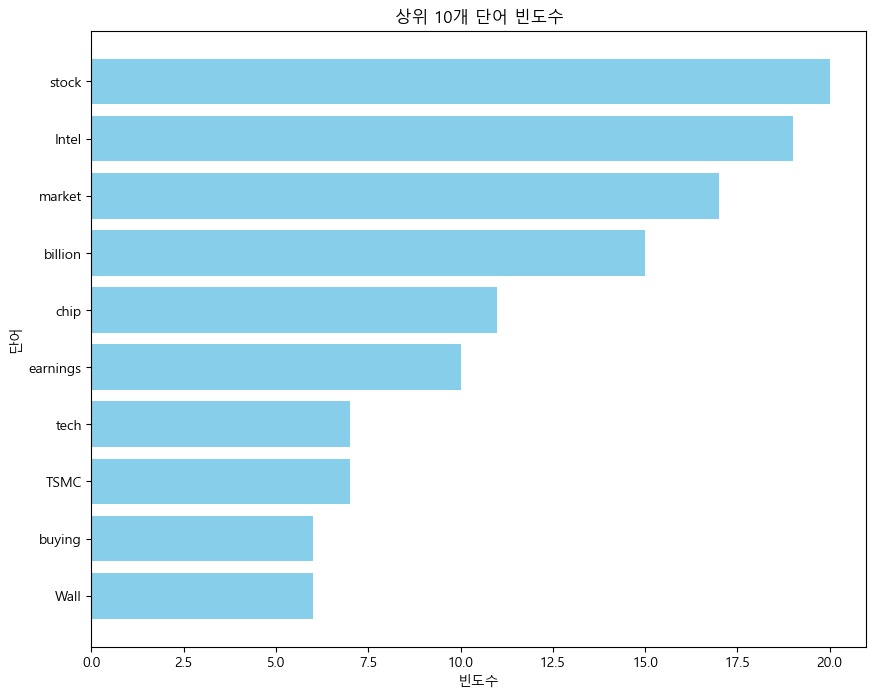

In [48]:
# 바 차트 시각화
plt.figure(figsize=(10, 8))
plt.barh(words, counts, color='skyblue')
plt.xlabel('빈도수')
plt.ylabel('단어')
plt.title('상위 10개 단어 빈도수')
plt.gca().invert_yaxis()
plt.show()

In [49]:
# 내용 빈도수 확인
sorted_sft = dict(sorted(counts_sft.items(), key = lambda item: item[1], reverse = True))

In [50]:
for word, freq in list(sorted_sft.items())[:100]:
    print(f"{word}: {freq}")

earnings: 562
market: 451
revenue: 239
data: 153
growth: 148
higher: 140
quarter: 126
past: 118
report: 114
business: 106
intel: 42
course: 21
experience: 18
margins: 18
find: 18
happens: 18
foundry: 18
matter: 18
amid: 18
Corsair: 18
Energy: 17
House: 17
Congress: 17
give: 17
billions: 17
realize: 17
Trust: 17
begin: 17
Qualcomm: 17
particularly: 17
allow: 17
outside: 17
leader: 17
concerns: 17
Markets: 17
relative: 17
closing: 17
jobs: 17
mean: 17
valuable: 17
antitrust: 17
BABA: 17
Xbox: 17
platforms: 17
continues: 17
feel: 17
negative: 17
issues: 17
semiconductors: 17
ChatGPT: 17
impact: 17
investments: 17
Jones: 17
cards: 17
H100: 17
declined: 17
yield: 17
dividends: 17
postimg: 17
trades: 16
lead: 16
heavily: 16
thinking: 16
however: 16
question: 16
remains: 16
revenues: 16
initial: 16
yesterday: 16
towards: 16
morning: 16
known: 16
Reserve: 16
personal: 16
yields: 16
probably: 16
FRIDAY: 16
Today: 16
alone: 16
claims: 16
trend: 16
effect: 16
President: 16
turn: 16
popular: 16
st

In [51]:
words_sft = ['earnings', 'market', 'revenue', 'data', 'growth', 'higher', 'quarter', 'past', 'report', 'business']
countsft = [562, 451, 239, 153, 148, 140, 126, 118, 114, 106]

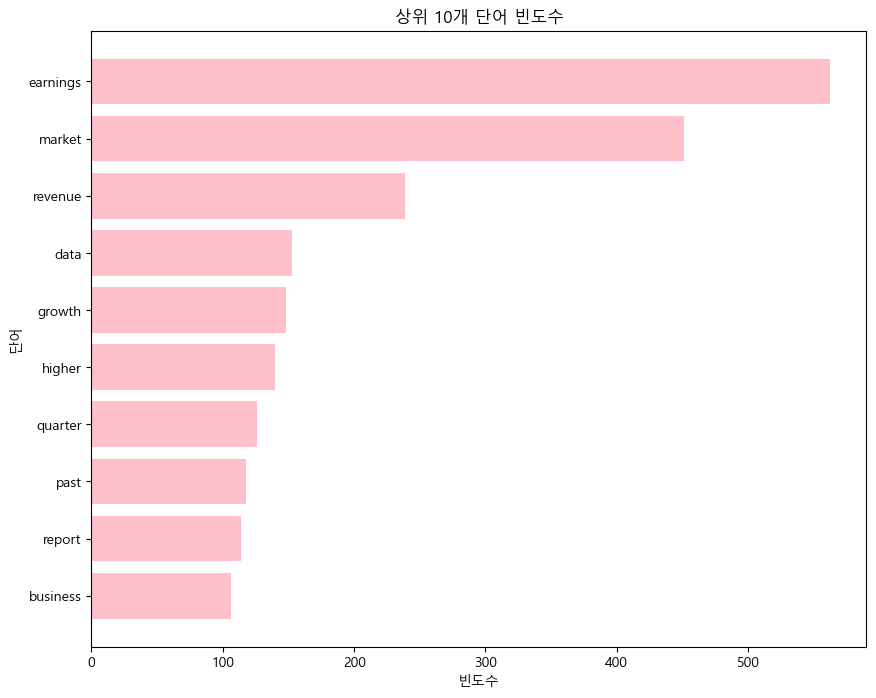

In [52]:
# 바 차트 시각화
plt.figure(figsize=(10, 8))
plt.barh(words_sft, countsft, color='pink')
plt.xlabel('빈도수')
plt.ylabel('단어')
plt.title('상위 10개 단어 빈도수')
plt.gca().invert_yaxis()
plt.show()

# **제출 시 API 인증 부분의 id, secret은 모두 지우고 제출해주세요!**

### 3. 자유 분석

위에서 진행한 분석만으로는 유의미한 인사이트를 도출하기는 어렵습니다. 추가적인 분석을 통해 해당 주식에 대한 평가가 긍정적인지, 또는 어떠한 이슈가 있는지 확인하는 것과 같은 추가적인 분석을 진행해주세요. 게시글이 아닌 리뷰를 가져오는 것도 가능합니다.

또한 본 분석에서 사용한 데이터가 아닌 다른 데이터를 활용하거나 또 다른 커뮤니티 혹은 사이트에서 API를 받아와 새로운 주제를 가지고 분석하는 것도 좋습니다:)

In [90]:
# VADER에 대한 설명 - ChatGTP 요약본
## 원문 링크 : https://medium.com/@rslavanyageetha/vader-a-comprehensive-guide-to-sentiment-analysis-in-python-c4f1868b0d2e

In [98]:
# VADER의 분석 매커니즘

# VADER는 사전 기반(lexicon-based) 방식으로 감정을 분석
# 기본적인 동작 원리는 **사전(lexicon)**을 기반으로 단어와 문구의 감정 극성을 계산하고, 특정 규칙을 적용하여 문장의 전체 감정 점수를 산출하는 것

In [97]:
# 1. 감정 사전(Lexicon)

# VADER는 감정 단어가 포함된 사전을 사용
# 이 사전은 각 단어가 긍정적인지 부정적인지, 그리고 그 강도가 어느 정도인지를 나타내며, 사전에 등록된 단어에는 그 단어의 감정 점수가 미리 할당되어 있음

# 예: great는 긍정적 단어로 등록되어 있고, +3.1의 감정 점수가 할당
# 반대로 terrible은 부정적 단어로 등록되어 있고, -2.1의 감정 점수가 할당

In [96]:
# 2. 특정 감정 규칙의 적용

# VADER는 단순히 단어의 감정 점수를 합산하는 것이 아님
# 텍스트의 문맥을 고려하기 위해 몇 가지 규칙을 적용

# 규칙
## A. 대문자 사용: 
## 전체 단어가 대문자로 쓰였을 경우, 해당 단어의 감정 강도가 더 높게 반영
## 예: "AMAZING!"처럼 대문자로 강조된 단어는 기본적으로 더 강한 긍정적 감정으로 계산

## B. 부사/강조어: very, extremely 같은 부사는 뒤따르는 감정 단어의 강도를 높이거나 낮춤
## 예: very good는 good보다 긍정적 점수를 더 많이 부여됨

## C. 부정어(Negation): not, never 같은 부정어는 감정 단어의 극성을 반전
## 예: not bad는 bad와 정반대로 계산되어 긍정적 의미로 간주

## D. 구두점: !, ?와 같은 감정적인 강조를 나타내는 구두점도 감정 강도를 변화
## 예: "amazing!"은 "amazing"보다 더 긍정적 점수 부여

In [95]:
# 3. 감정 극성 계산

# VADER는 텍스트 내 모든 단어에 대해 감정 점수를 부여하고, 이를 종합하여 최종 점수를 계산

# Positive(긍정): 텍스트에서 감정이 긍정적으로 평가된 비율
# Negative(부정): 텍스트에서 감정이 부정적으로 평가된 비율.
# Neutral(중립): 감정적으로 중립적인 단어들의 비율.
# Compound(종합 점수): 텍스트의 전체적인 감정을 종합한 점수로, -1(매우 부정적)에서 +1(매우 긍정적) 사이의 값
# 이 값이 텍스트의 최종 감정 상태를 나타냄

In [94]:
# 4. 종합 감정 점수 (Compound Score)
# 텍스트의 전체적인 감정 상태를 종합적으로 나타내는 값
# 이 점수는 텍스트의 긍정, 부정, 중립적 성분을 모두 합산하고 특정 공식을 적용하여 계산
# -1에서 +1 사이의 값으로, 다음과 같이 해석

# Positive(긍정적): 0.05 이상일 때
# Neutral(중립적): -0.05와 0.05 사이일 때
# Negative(부정적): -0.05 이하일 때

In [53]:
!pip install vaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   ---------------------------------------- 126.0/126.0 kB 1.8 MB/s eta 0:00:00


In [54]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [55]:
VAD = SentimentIntensityAnalyzer()

In [60]:
def vader_sentiment(reddit):
    scores = VAD.polarity_scores(reddit)
    return scores["compound"]

In [61]:
nvda_df_tise["title_sentiment"] = nvda_df_tise["title"].apply(vader_sentiment)
nvda_df_tise["sft_sentiment"] = nvda_df_tise["selftext"].apply(vader_sentiment)

In [62]:
sentiment_df = nvda_df_tise[["title_sentiment", "sft_sentiment"]].copy()

In [63]:
sentiment_df

,title_sentiment,sft_sentiment
0,0.0000,0.9964
1,0.0000,0.9198
2,0.0000,-0.8552
3,0.0000,0.9954
4,0.0000,0.9998
...,...,...
230,0.0000,0.9855
231,0.4215,0.9928
232,0.2023,0.9705
233,0.3612,0.9854


In [64]:
sentiment_df.describe()

,title_sentiment,sft_sentiment
count,235.000000,235.000000
mean,0.052116,0.622302
std,0.291817,0.562345
min,-0.804300,-0.995300
25%,0.000000,0.505350
50%,0.000000,0.902500
75%,0.226300,0.985750
max,0.718400,0.999900


In [99]:
# 중립 점수 확인하기

neutral_title = sentiment_df[(sentiment_df["title_sentiment"] > -0.05 ) & (sentiment_df["title_sentiment"] < 0.05)]
netural_sft = sentiment_df[(sentiment_df["sft_sentiment"] > -0.05 ) & (sentiment_df["sft_sentiment"] < 0.05)]

In [100]:
# 중립에 해당되는 점수가 제목에서 몇개인지 확인하기
neutral_title.shape[0]

109

In [73]:
# 중립에 해당되는 점수가 내용에서 몇개인지 확인하기
neutral_sft.shape[0]

5

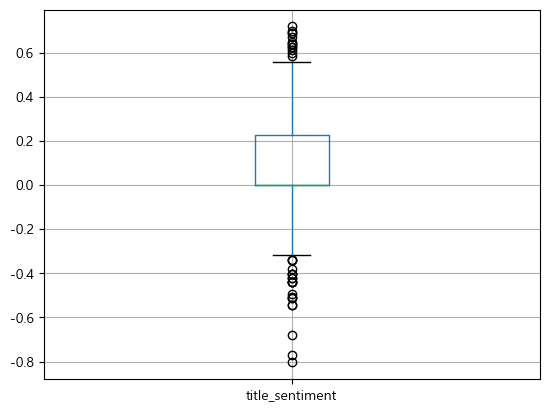

In [103]:
# 제목 감정 박스플롯
sentiment_df.boxplot(column = ["title_sentiment"])
plt.show()

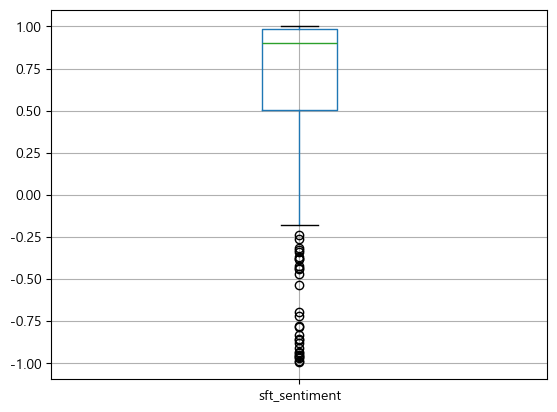

In [104]:
# 제목 감정 박스플롯
sentiment_df.boxplot(column = ["sft_sentiment"])
plt.show()

In [ ]:
# 몇 몇 이상치가 존재하기는 하지만,
## VADER 감성분석에서는 내용이 전반적으로 NVIDIA에 대해 긍정적으로 평가하고 있음